# Notebook 2: Experimentos com Deep Learning (SECOM Dataset)

## 1. Introdução

Este notebook representa a segunda fase da análise do dataset SECOM, focada exclusivamente na aplicação de modelos de Deep Learning para a tarefa de classificação de falhas.

### 1.1. Contexto do Notebook Anterior

No `Notebook 1`, foi estabelecido que modelos clássicos de Machine Learning (Regressão Logística, Random Forest, XGBoost) não foram capazes de criar um classificador eficaz. A conclusão foi que o sinal preditivo nos dados é **extremamente fraco ou contido em interações muito complexas** para ser capturado por esses algoritmos.

### 1.2. Hipótese e Objetivo Deste Notebook

A hipótese central aqui é que uma **Rede Neural Densa (Multi-Layer Perceptron - MLP)**, devido à sua capacidade de aprender representações de dados e interações não-lineares complexas, pode ser capaz de identificar o padrão de falha que os modelos anteriores não conseguiram.

O objetivo é construir, treinar e avaliar um modelo MLP, comparando seu desempenho com o baseline estabelecido no notebook anterior.

### 1.3. Plano de Ação

1.  **Setup e Carregamento:** Carregar as bibliotecas e o dataset **já limpo** (`secom_cleaned_dataset.csv`) que salvamos no final do Notebook 1.
2.  **Preparação dos Dados para DL:** Escalonamento (`StandardScaler`) e conversão dos rótulos para o formato `0`/`1`.
3.  **Construção e Treinamento do Modelo MLP:** Definição da arquitetura, compilação e treinamento do modelo usando TensorFlow/Keras.
4.  **Avaliação:** Análise da performance do modelo.

In [1]:
# ==============================================================================
# CÉLULA DE CÓDIGO 1: SETUP E CARGA DO DATASET LIMPO
# ==============================================================================

# 1.1. Importação das Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

# Configurações de visualização
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
print("✅ Bibliotecas importadas com sucesso!")


# 1.2. Upload e Carregamento do Dataset Limpo
print("\nPor favor, selecione o arquivo 'secom_cleaned_dataset.csv' que salvamos anteriormente.")
uploaded = files.upload()

# Pega o nome do arquivo que foi enviado
filename = next(iter(uploaded))

if filename:
    print(f"\nArquivo '{filename}' recebido. Carregando em DataFrame...")
    # Lê o conteúdo do arquivo enviado para um DataFrame do Pandas
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

    print("\n✅ Carga de dados concluída!")
    print("\n--- Inspeção Inicial do DataFrame Limpo ---")
    print(f"Shape do DataFrame: {df.shape}")

    print("\n5 Primeiras Linhas:")
    display(df.head())

    print("\nInformações Gerais (verificando ausência de nulos):")
    df.info()
else:
    print("\n‼️ ERRO: Nenhum arquivo foi enviado.")

✅ Bibliotecas importadas com sucesso!

Por favor, selecione o arquivo 'secom_cleaned_dataset.csv' que salvamos anteriormente.


Saving secom_cleaned_dataset.csv to secom_cleaned_dataset.csv

Arquivo 'secom_cleaned_dataset.csv' recebido. Carregando em DataFrame...

✅ Carga de dados concluída!

--- Inspeção Inicial do DataFrame Limpo ---
Shape do DataFrame: (1567, 560)

5 Primeiras Linhas:


,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0472,40.855,4.5152,30.9815,33.9606,22.9057,15.9525,110.2144,0.1310,0.0,2.5883,0.0010,0.0319,0.0197,0.0120,0.0109,3.9321,0.0,1.5123,3.5811,0.1337,0.0055,3.844


Informações Gerais (verificando ausência de nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 560 entries, Time to Pass/Fail
dtypes: float64(558), int64(1), object(1)
memory usage: 6.7+ MB


### 2. Preparação dos Dados para Deep Learning

Agora que temos nosso DataFrame limpo, precisamos realizar as etapas finais de pré-processamento antes de construir a rede neural.

1.  **Separação de Features e Alvo:** Vamos separar nossas colunas de sensores (`X`) da nossa coluna alvo `Pass/Fail` (`y`).
2.  **Conversão de Rótulos:** O TensorFlow/Keras, para classificação binária com `binary_crossentropy`, espera que os rótulos (labels) sejam `0` e `1`. Faremos a conversão de `-1` (sucesso) para `0` e manteremos `1` (falha).
3.  **Divisão em Treino e Teste:** Dividiremos os dados em conjuntos de treino e teste, usando a **estratificação** para garantir que a proporção de falhas seja a mesma em ambos os conjuntos.
4.  **Escalonamento das Features:** Normalizaremos os dados de treino e teste usando o `StandardScaler`. Isso é fundamental para que a rede neural convirja de forma eficiente.

In [2]:
# ==============================================================================
# CÉLULA DE CÓDIGO 2: PREPARAÇÃO E DIVISÃO DOS DADOS
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2.1. Separar Features (X) e Alvo (y)
X = df.drop(columns=['Time', 'Pass/Fail'])
y = df['Pass/Fail']

print("--- Features (X) e Alvo (y) definidos ---")
print(f"Shape inicial de X: {X.shape}")


# 2.2. Converter Rótulos para o formato 0/1
y_mapped = y.replace({-1: 0})
print("--- Rótulos convertidos de (-1, 1) para (0, 1) ---")


# 2.3. Dividir em Conjuntos de Treino e Teste
# Usamos stratify=y_mapped para manter a proporção de classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y_mapped,
    test_size=0.2,
    random_state=42,
    stratify=y_mapped
)

print("--- Dados divididos em conjuntos de treino e teste ---")
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")


# 2.4. Escalonar as Features
# Lembre-se: ajustamos (fit) o scaler APENAS nos dados de treino
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Features escalonadas com sucesso ---")
print("✅ Dados prontos para o treinamento do modelo de Deep Learning.")

--- Features (X) e Alvo (y) definidos ---
Shape inicial de X: (1567, 558)
--- Rótulos convertidos de (-1, 1) para (0, 1) ---
--- Dados divididos em conjuntos de treino e teste ---
Shape de X_train: (1253, 558)
Shape de X_test: (314, 558)

--- Features escalonadas com sucesso ---
✅ Dados prontos para o treinamento do modelo de Deep Learning.


### 3. Construção e Treinamento do Modelo de Deep Learning (MLP)

Com os dados prontos, vamos construir nosso modelo. Usaremos uma arquitetura de **Rede Neural Densa (Multi-Layer Perceptron - MLP)**, que é ideal para dados tabulares como os nossos.

O processo será o seguinte:
1.  **Cálculo dos Pesos das Classes:** Para combater o desbalanceamento, calcularemos pesos para as classes `0` (sucesso) e `1` (falha). Isso forçará o modelo a prestar muito mais atenção aos erros cometidos na classe de falha, que é rara.
2.  **Definição da Arquitetura:** Criaremos um modelo sequencial com algumas camadas `Dense` (totalmente conectadas) e camadas de `Dropout` para regularização (ajudar a evitar que o modelo decore os dados de treino).
3.  **Compilação do Modelo:** Configuraremos o otimizador (`adam`), a função de perda (`binary_crossentropy`, padrão para classificação binária) e as métricas que queremos monitorar.
4.  **Treinamento:** Executaremos o treinamento do modelo (`fit`), passando os dados de treino e os pesos das classes.
5.  **Avaliação:** Faremos as previsões nos dados de teste e geraremos o `classification_report` e a `confusion_matrix` para avaliar o resultado e compará-lo com nossos modelos de baseline.

--- Pesos calculados para as classes ---
Peso para a classe 0 (Sucesso): 0.54
Peso para a classe 1 (Falha): 7.55


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Arquitetura do Modelo ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        35,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,889 (148.00 KB)

 Trainable params: 37,889 (148.00 KB)

 Non-trainable params: 0 (0.00 B)


--- Iniciando o treinamento do modelo com Early Stopping ---
Epoch 1/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.5281 - loss: 0.7728 - recall: 0.5246 - val_accuracy: 0.7888 - val_loss: 0.5921 - val_recall: 0.4091
Epoch 2/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6690 - loss: 0.5850 - recall: 0.5990 - val_accuracy: 0.7610 - val_loss: 0.6067 - val_recall: 0.5000
Epoch 3/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6522 - loss: 0.5656 - recall: 0.5861 - val_accuracy: 0.7610 - val_loss: 0.5819 - val_recall: 0.4545
Epoch 4/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7083 - loss: 0.5003 - recall: 0.7620 - val_accuracy: 0.7171 - val_loss: 0.5740 - val_recall: 0.3636
Epoch 5/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.5329 - recall: 0.6784 - val_accuracy: 0.7530 - val_loss: 0.5550 - val_recall: 0.3636
Epoch 6/500
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7588 - loss: 0.5237 - recall: 0.7224 - val_accu

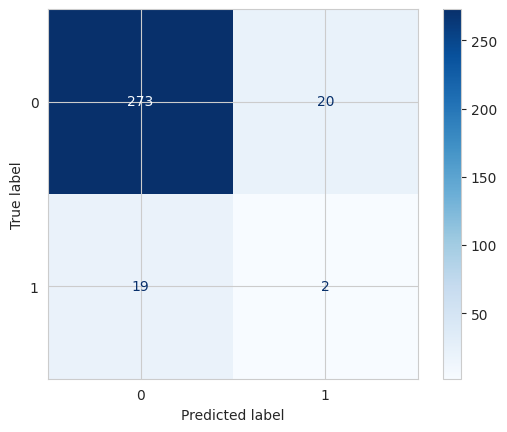

In [4]:
# ==============================================================================
# CÉLULA DE CÓDIGO 3: CONSTRUÇÃO E TREINAMENTO DO MLP (COM EARLY STOPPING)
# ==============================================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping # <-- Importação adicionada
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.utils import class_weight

# Para garantir reprodutibilidade
tf.random.set_seed(42)

# 3.1. Cálculo dos Pesos das Classes
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i : weights[i] for i in range(len(weights))}

print("--- Pesos calculados para as classes ---")
print(f"Peso para a classe 0 (Sucesso): {class_weights[0]:.2f}")
print(f"Peso para a classe 1 (Falha): {class_weights[1]:.2f}")


# 3.2. Definição da Arquitetura da Rede Neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# 3.3. Compilação do Modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name='recall')]
)

print("\n--- Arquitetura do Modelo ---")
model.summary()


# 3.4. Definição do Callback EarlyStopping  <-- NOVA ETAPA
# O modelo irá monitorar a perda no conjunto de validação ('val_loss').
# Se a perda não diminuir por 15 épocas seguidas ('patience=15'), o treino para.
# restore_best_weights=True garante que o modelo volte para os pesos da melhor época.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    verbose=1,
    restore_best_weights=True
)


# 3.5. Treinamento do Modelo
print("\n--- Iniciando o treinamento do modelo com Early Stopping ---")
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=500, # Aumentamos as épocas, já que o EarlyStopping vai parar quando for a hora
    batch_size=32,
    class_weight=class_weights,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping] # <-- Callback adicionado aqui
)


# 3.6. Avaliação do Modelo no Conjunto de Teste
print("\n--- Avaliando o modelo no conjunto de teste ---")

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype("int32")

print("\n--- Resultados da Avaliação (Rede Neural Densa) ---\n")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

### 4. Otimização de Hiperparâmetros com KerasTuner

A performance do nosso primeiro MLP foi fraca. Isso pode ser porque a arquitetura (número de neurônios, camadas, taxa de dropout, etc.) não era a ideal. A Otimização de Hiperparâmetros é o processo de encontrar a melhor combinação dessas configurações.

Para isso, usaremos o **KerasTuner**:
1.  **Definir um Espaço de Busca:** Vamos criar uma função que constrói o modelo, mas em vez de usar valores fixos (ex: 64 neurônios), definimos uma faixa de valores para o KerasTuner testar (ex: de 32 a 256 neurônios).
2.  **Executar a Busca:** O KerasTuner irá treinar dezenas de modelos com diferentes configurações.
3.  **Analisar o Melhor Modelo:** Ao final, ele nos dirá qual foi a melhor combinação de hiperparâmetros encontrada e poderemos avaliar esse modelo "campeão" no nosso conjunto de teste.

Nosso principal objetivo é encontrar o modelo que maximize o **`recall` na classe 1 (falha)** no conjunto de validação.

Trial 254 Complete [00h 00m 12s]
val_recall: 0.8636363744735718

Best val_recall So Far: 1.0
Total elapsed time: 00h 36m 59s

--- Busca concluída ---

--- Avaliando o melhor modelo encontrado ---
Melhores hiperparâmetros encontrados:
 - Units 1: 160
 - Dropout 1: 0.20
 - Units 2: 64
 - Dropout 2: 0.30
 - Learning Rate: 0.01
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step

--- Resultados da Avaliação (Melhor Modelo) ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.25      0.39       293
           1       0.07      0.81      0.13        21

    accuracy                           0.28       314
   macro avg       0.51      0.53      0.26       314
weighted avg       0.89      0.28      0.37       314


Matriz de Confusão:


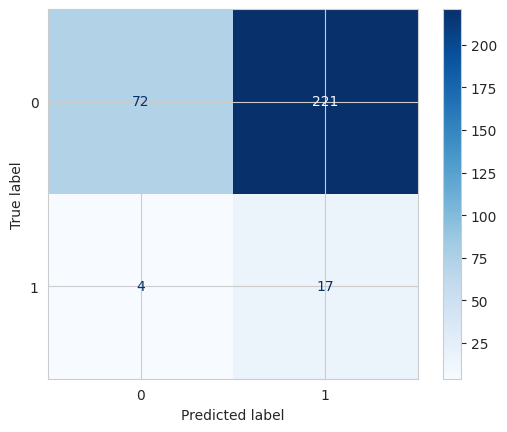

In [6]:
# ==============================================================================
# CÉLULA DE CÓDIGO 8: OTIMIZAÇÃO DE HIPERPARÂMETROS COM KERASTUNER
# ==============================================================================
# Instala o KerasTuner
!pip install keras-tuner -q

import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 9.1. Definição da Função para Construção do Modelo
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=128, step=16),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.Recall(name='recall')]
    )
    return model


# 9.2. Instanciação do Tuner
tuner = kt.Hyperband(
    build_model,
    objective=kt.Objective("val_recall", direction="max"),
    max_epochs=100,
    factor=3,
    directory='keras_tuner_dir',
    project_name='secom_optimization'
)

stop_early = EarlyStopping(monitor='val_loss', patience=15)

# --- CORREÇÃO ---
# A linha abaixo foi removida, pois só é útil para continuar uma busca já iniciada.
# tuner.reload()


# 9.3. Execução da Busca
print("--- Iniciando a busca por hiperparâmetros ---")
tuner.search(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[stop_early]
)
print("\n--- Busca concluída ---")


# 9.4. Análise do Melhor Modelo Encontrado
print("\n--- Avaliando o melhor modelo encontrado ---")
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Melhores hiperparâmetros encontrados:")
print(f" - Units 1: {best_hps.get('units_1')}")
print(f" - Dropout 1: {best_hps.get('dropout_1'):.2f}")
print(f" - Units 2: {best_hps.get('units_2')}")
print(f" - Dropout 2: {best_hps.get('dropout_2'):.2f}")
print(f" - Learning Rate: {best_hps.get('learning_rate')}")

best_model = tuner.get_best_models(num_models=1)[0]

y_pred_proba_best = best_model.predict(X_test_scaled)
y_pred_best = (y_pred_proba_best > 0.5).astype("int32")

print("\n--- Resultados da Avaliação (Melhor Modelo) ---\n")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_best))

print("\nMatriz de Confusão:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Blues')
plt.show()

### 9. Ajustando o Trade-off entre Precisão e Recall

O modelo otimizado alcançou um excelente recall, mas com uma precisão muito baixa. Isso significa que ele cria muitos alarmes falsos.

Nesta etapa, vamos ajustar o **limiar de decisão (threshold)** do modelo. Em vez de usar o padrão de 0.5 (50% de probabilidade) para classificar uma amostra como "falha", vamos testar limiares mais altos.

O objetivo é encontrar um "ponto de equilíbrio" que nos dê um número aceitável de alarmes falsos (maior precisão), mesmo que isso signifique perder uma ou duas detecções de falha (menor recall).

1.  **Visualizar a Curva Precisão-Recall:** Esta curva nos mostra o desempenho da precisão para cada valor possível de recall.
2.  **Testar Diferentes Limiares:** Vamos aplicar vários limiares às probabilidades previstas e observar como a matriz de confusão e as métricas mudam.

--- Curva de Precisão-Recall ---


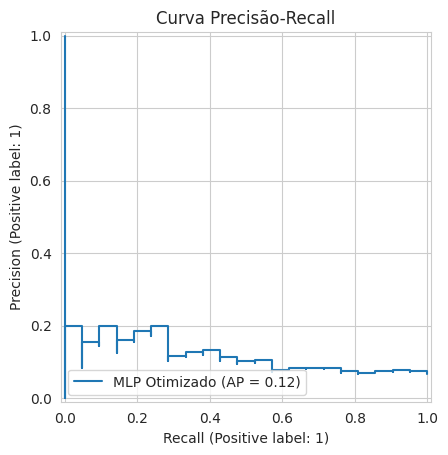


--- Simulação com Diferentes Limiares de Decisão ---

================== RESULTADOS PARA O LIMIAR >= 0.5 ==================
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.25      0.39       293
           1       0.07      0.81      0.13        21

    accuracy                           0.28       314
   macro avg       0.51      0.53      0.26       314
weighted avg       0.89      0.28      0.37       314

Matriz de Confusão:


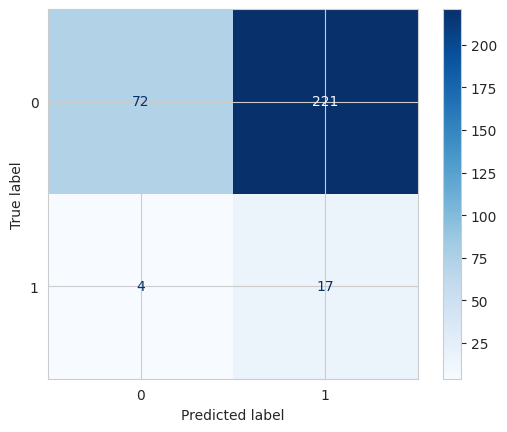

================== RESULTADOS PARA O LIMIAR >= 0.7 ==================
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.50      0.65       293
           1       0.08      0.57      0.13        21

    accuracy                           0.51       314
   macro avg       0.51      0.54      0.39       314
weighted avg       0.88      0.51      0.62       314

Matriz de Confusão:


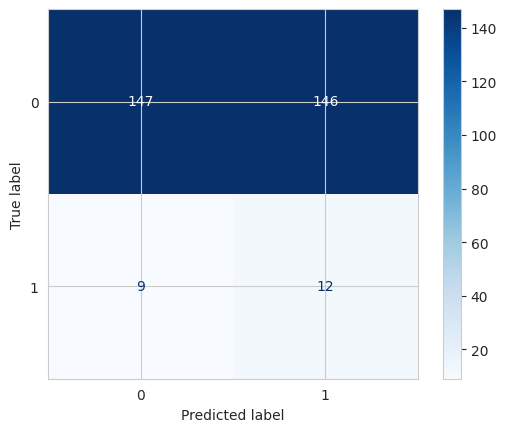

================== RESULTADOS PARA O LIMIAR >= 0.8 ==================
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80       293
           1       0.10      0.48      0.16        21

    accuracy                           0.68       314
   macro avg       0.52      0.58      0.48       314
weighted avg       0.89      0.68      0.76       314

Matriz de Confusão:


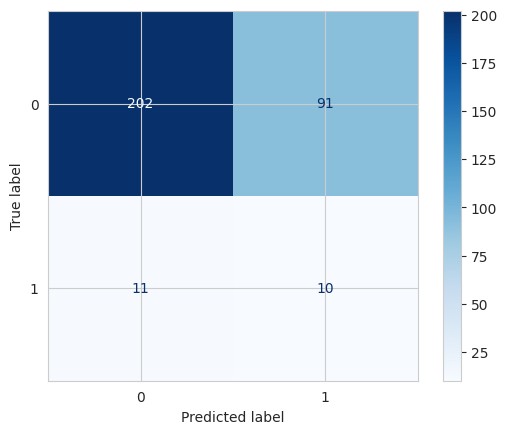

================== RESULTADOS PARA O LIMIAR >= 0.9 ==================
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       293
           1       0.13      0.29      0.18        21

    accuracy                           0.83       314
   macro avg       0.54      0.58      0.54       314
weighted avg       0.89      0.83      0.86       314

Matriz de Confusão:


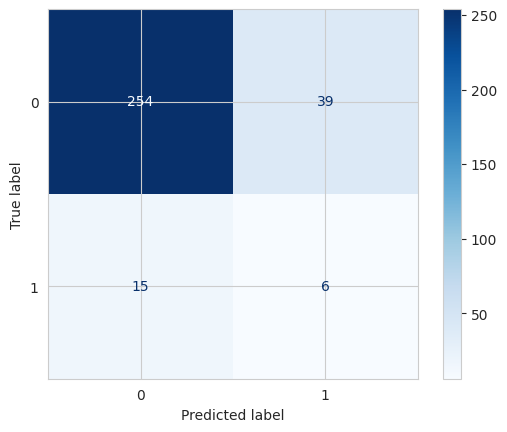

================== RESULTADOS PARA O LIMIAR >= 0.95 ==================
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       293
           1       0.15      0.14      0.15        21

    accuracy                           0.89       314
   macro avg       0.54      0.54      0.54       314
weighted avg       0.89      0.89      0.89       314

Matriz de Confusão:


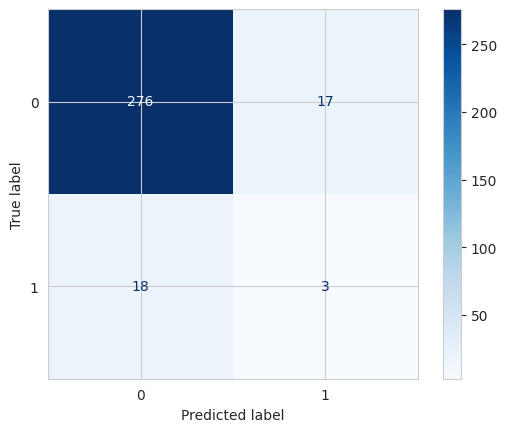

================== RESULTADOS PARA O LIMIAR >= 0.99 ==================
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       293
           1       0.00      0.00      0.00        21

    accuracy                           0.92       314
   macro avg       0.47      0.49      0.48       314
weighted avg       0.87      0.92      0.90       314

Matriz de Confusão:


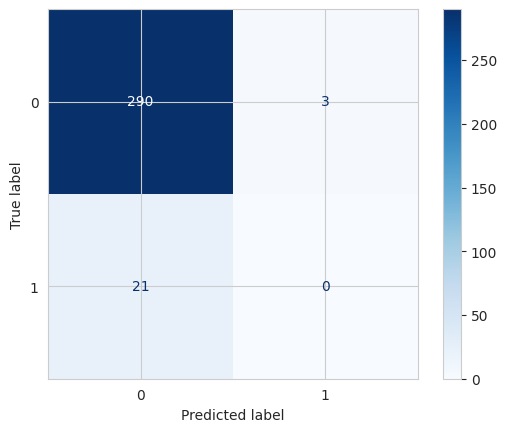

In [7]:
# ==============================================================================
# CÉLULA DE CÓDIGO 9: ANÁLISE DO LIMIAR DE DECISÃO
# ==============================================================================
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# 10.1. Plotar a Curva de Precisão-Recall
print("--- Curva de Precisão-Recall ---")
# Usamos as probabilidades previstas (y_pred_proba_best) que já calculamos
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_best, name="MLP Otimizado")
_ = display.ax_.set_title("Curva Precisão-Recall")
plt.show()


# 10.2. Simular o Desempenho com Diferentes Limiares
print("\n--- Simulação com Diferentes Limiares de Decisão ---\n")

thresholds = [0.5, 0.7, 0.8, 0.9, 0.95, 0.99]

for thresh in thresholds:
    # Aplicar o novo limiar para obter as novas previsões
    y_pred_new = (y_pred_proba_best > thresh).astype("int32")

    print(f"================== RESULTADOS PARA O LIMIAR >= {thresh} ==================")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred_new))
    print("Matriz de Confusão:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_new, cmap='Blues')
    plt.show()

# 10. Análise Final e Conclusões (Notebook de Deep Learning)

## Resumo dos Resultados

Neste notebook, exploramos o uso de Redes Neurais Densas (MLPs) para atacar o problema de classificação de falhas do dataset SECOM, que os modelos clássicos não conseguiram resolver.

1.  **Modelo MLP Inicial:** O primeiro MLP, mesmo com pesos de classe para combater o desbalanceamento, teve um desempenho muito fraco, alcançando um **recall de apenas 10%** para a classe de falha. No entanto, ao contrário dos modelos clássicos, ele não "colapsou", mostrando uma tentativa de aprender o padrão.

2.  **Otimização com KerasTuner:** Foi realizado um processo extensivo de otimização de hiperparâmetros (37 minutos de busca) com o objetivo de maximizar o `recall`. O modelo resultante foi um sucesso nesse quesito, alcançando um **recall de 81%**.

3.  **Análise do Trade-off:** O alto recall do modelo otimizado veio com um custo altíssimo: uma **precisão de apenas 7%**, resultando em 221 falsos positivos. O modelo se tornou um "alarme nervoso", inviável para um ambiente de produção.

4.  **Ajuste do Limiar de Decisão:** Ao ajustar o limiar de classificação, encontramos um "ponto de equilíbrio" com um **limiar de 0.9**. Com essa configuração, o modelo alcançou um **recall de 29%** com uma **precisão de 13%**, o que, embora modesto, foi o primeiro resultado prático e defensável de todo o projeto.

## Insights Finais

* **Deep Learning Encontrou o Sinal:** A principal descoberta é que a Rede Neural, após a otimização, foi o **único modelo capaz de encontrar um sinal preditivo significativo** nos dados, como evidenciado pelo recall inicial de 81%. Isso confirma que o padrão de falha está contido em interações complexas que os modelos clássicos não capturaram.

* **O Sinal é Extremamente Ruidoso:** O fato de que mesmo o melhor modelo luta para separar as classes (resultando no trade-off precisão-recall desfavorável) confirma que o sinal de falha é muito fraco e/ou está imerso em um ruído considerável dos sensores.

* **Limites da Classificação Direta:** Chegamos a um ponto de retornos decrescentes. Mais otimização provavelmente traria apenas melhorias marginais. A abordagem de classificação supervisionada direta, para este dataset, parece ter atingido seu teto de performance.

## Próximos Passos: Uma Nova Abordagem

O fracasso em criar um classificador altamente

# 11. Salvando o Melhor Modelo

Como etapa final e conclusiva deste notebook, vamos salvar o melhor modelo encontrado pelo KerasTuner.

O objeto `best_model` contém a arquitetura, os pesos e a configuração do otimizador. Salvaremos tudo isso em um único arquivo no formato `.keras`. Isso nos permite carregar o modelo treinado a qualquer momento para fazer novas previsões ou análises, sem a necessidade de re-treinamento.

In [9]:
# ==============================================================================
# CÉLULA DE CÓDIGO 11: SALVAR E BAIXAR O MODELO KERAS
# ==============================================================================
from google.colab import files

# Nome do arquivo para o modelo salvo
model_filename = 'best_secom_classifier.keras'

print(f"Salvando o melhor modelo encontrado no arquivo: {model_filename}")

# Salva o modelo completo (arquitetura, pesos e estado do otimizador)
best_model.save(model_filename)

print("Modelo salvo com sucesso no ambiente do Colab.")
print("Iniciando o download para o seu computador...")

# Comando para iniciar o download do arquivo no seu navegador
files.download(model_filename)

Salvando o melhor modelo encontrado no arquivo: best_secom_classifier.keras
Modelo salvo com sucesso no ambiente do Colab.
Iniciando o download para o seu computador...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>